## Communicate Data Findings

### Intodaction
#### This project is divided into two major parts :

#### In the first part, we will conduct an exploratory data analysis on a dataset of prosperLoanData. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from multivariate relationships.

#### In the second part, We will take our main findings from our exploration and convey them to others through an explanatory analysis. To this end, We will create a slide deck that leverages polished, explanatory visualizations to communicate your results.



In [79]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
print(loan.shape)

(113937, 81)


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
loan.duplicated().sum()

0

In [8]:
loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
missing_values= loan.isnull()
#missing_values.head()
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print(" ")

ListingKey
False    113937
Name: ListingKey, dtype: int64
 
ListingNumber
False    113937
Name: ListingNumber, dtype: int64
 
ListingCreationDate
False    113937
Name: ListingCreationDate, dtype: int64
 
CreditGrade
True     84984
False    28953
Name: CreditGrade, dtype: int64
 
Term
False    113937
Name: Term, dtype: int64
 
LoanStatus
False    113937
Name: LoanStatus, dtype: int64
 
ClosedDate
True     58848
False    55089
Name: ClosedDate, dtype: int64
 
BorrowerAPR
False    113912
True         25
Name: BorrowerAPR, dtype: int64
 
BorrowerRate
False    113937
Name: BorrowerRate, dtype: int64
 
LenderYield
False    113937
Name: LenderYield, dtype: int64
 
EstimatedEffectiveYield
False    84853
True     29084
Name: EstimatedEffectiveYield, dtype: int64
 
EstimatedLoss
False    84853
True     29084
Name: EstimatedLoss, dtype: int64
 
EstimatedReturn
False    84853
True     29084
Name: EstimatedReturn, dtype: int64
 
ProsperRating (numeric)
False    84853
True     29084
Name: ProsperRat

In [10]:
# Getting the number of missing values in each column
missing_values = loan.isna().sum()

# Excluding columns that contains 0 missing values
missing_values = missing_values[missing_values >= 1]

# Getting the percentages of missing values and round down the result 
percent_missing = missing_values * 100 / loan.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([missing_values, percent_missing], axis=1, 
          keys=['missing_values', 'Percentage']).\
          sort_values(by="missing_values", ascending=False)

,missing_values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


#### It seems that there are a lot of nulls for most of the variables in the dataset since I'm only interested to investigate some of the features from this dataset, I will subset the dataframe to extract the features of interest for my analysis and remove the nulls for this subset dataframe only

In [11]:
#Define features of interest for this analysis
features =   ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)',
              'EmploymentStatus','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans',
              'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors','BorrowerAPR','ProsperScore',
            'Occupation','IncomeRange' ]

In [12]:
#Look at the dataset
loan[features].sample(6)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors,BorrowerAPR,ProsperScore,Occupation,IncomeRange
48854,60,Current,0.1579,B,1,Employed,0.0,3833.333333,NaN,20000,2013-04-24 00:00:00,0,1,0.18136,6.0,Teacher,"$25,000-49,999"
57923,36,Completed,0.2520,NaN,0,Full-time,7.0,2500.000000,NaN,5000,2007-05-14 00:00:00,1,45,0.25958,NaN,Other,"$25,000-49,999"
16289,36,Completed,0.0785,AA,7,Employed,0.0,2916.666667,2.0,6000,2010-10-07 00:00:00,0,120,0.08191,10.0,Other,"$25,000-49,999"
29616,36,Current,0.1119,A,1,Employed,0.0,4833.333333,NaN,10000,2014-03-07 00:00:00,0,1,0.14039,6.0,Postal Service,"$50,000-74,999"
68407,36,Current,0.1535,B,1,Employed,0.0,2500.000000,NaN,2000,2014-01-30 00:00:00,0,2,0.18990,6.0,Architect,"$25,000-49,999"
25368,36,Chargedoff,0.2400,NaN,4,Self-employed,0.0,3166.666667,NaN,2600,2008-02-11 00:00:00,0,58,0.26292,NaN,Other,"$25,000-49,999"


In [13]:
loan[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
BorrowerAPR                  113912 non-null float64
ProsperScore                 84853 non-null float64
Occupation                   110349 non-null object
IncomeRange                  113937 non-null object
dtypes:

In [14]:
# Check unique LoanStatus
loan['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [15]:
# Check unique Employment Status
loan['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [16]:
# Check unique Employment Status
loan['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

##### Since the variables EmploymentStatus, ProsperScore, Term ,LoanStatus are basically categorical variabels, I will change their datatype till categorical


## What is the structure of your dataset?
#### There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans.

#### This analysis will focus on factors that are related to Prosper loans status (LoanStatus).

#### The independent variables of interest are:             

In [17]:
loan['ProsperScore'] = loan['ProsperScore'].astype('category')
loan['Term'] = loan['Term'].astype('category')
loan['IncomeRange'] = loan['IncomeRange'].astype('category')
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype('category')
loan['LoanStatus'] = loan['LoanStatus'].astype('category')
print(loan[features].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
Term                         113937 non-null category
LoanStatus                   113937 non-null category
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null category
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
BorrowerAPR                  113912 non-null float64
ProsperScore                 84853 non-null category
Occupation                   110349 non-null object
IncomeRange                  113937 non-null catego

## What is/are the main feature(s) of interest in your dataset?
#### This analysis will focus on figuring out what features are best for predicting Prosper's loan statuses.



## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
#### The present analysis will investigate a group of borrowers features along with the type of the listing/loan will be analyzed to correctly understand which factors likely impact Prosper's final loan status.

#### The features listed in the previous section will be subject of this analysis. However, we do understand that it isn't exhaustive and additional features may be required, as well as a deeper business understanding and history of decisions made by Prosper top management.

## Univariate Exploration

#### In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.



In [18]:
# setting color
default_color = sb.color_palette()[9]

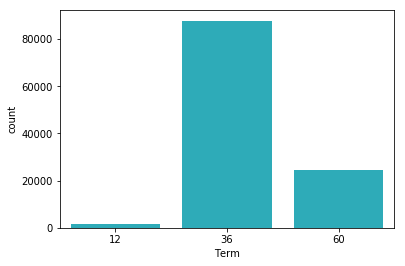

In [19]:
#First let's take a look at Term variable using a Count Plot:
#Visulizing the time periods for loan
sb.countplot(data = loan[features], x = 'Term', color = default_color);

#### For Term: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check LoanStatus:

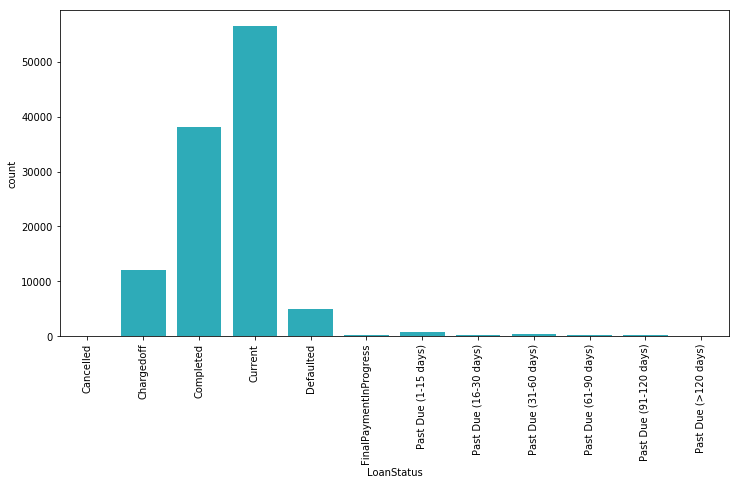

In [20]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = loan[features], x = 'LoanStatus', color = default_color);

#### Most of the loans in the dataset are actually Current loans. Following it with a big frequency the Completed loans, followed by Chargedoff, while Defaulted and Past due categories loans represent a minority. Up next - BorrowerRate:

Text(0,0.5,'Count')

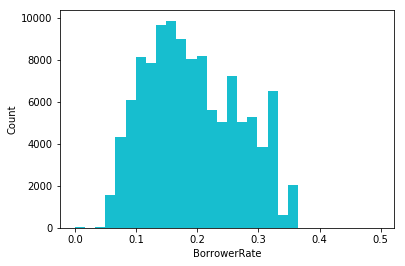

In [21]:
plt.hist(data=loan[features], x='BorrowerRate', bins=30, color = default_color);
plt.xlabel('BorrowerRate')
plt.ylabel('Count')

#### The distribution of the BorrowerRate appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [22]:
# Check the frequency of the top 2 peaks
loan[features].BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3500    1905
Name: BorrowerRate, dtype: int64

#### Turns out two most common rates are 0.3177 and 0.3199. Let's check ProsperRating (Alpha) next:

#### Because ProsperRating (Alpha) is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [23]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_list)
loan['ProsperRating (Alpha)'] = loan[features]['ProsperRating (Alpha)'].astype(ordered_var)

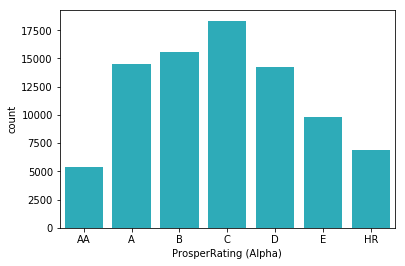

In [24]:
sb.countplot(data=loan[features], x='ProsperRating (Alpha)', color=default_color);

#### Interestingly enough ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through ListingCategory (numeric):

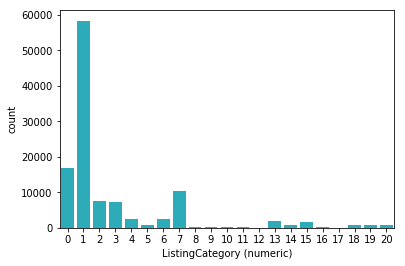

In [25]:
sb.countplot(data=loan[features], x='ListingCategory (numeric)', color=default_color);

#### The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business, 
4 - Personal Loan, 
5 - Student Use, 
6 - Auto, 
7- Other, 
8 - Baby&Adoption, 
9 - Boat, 
10 - Cosmetic Procedure, 
11 - Engagement Ring, 
12 - Green Loans, 
13 - Household Expenses, 
14 - Large Purchases, 
15 - Medical/Dental, 
16 - Motorcycle, 
17 - RV, 
18 - Taxes, 
19 - Vacation, 
20 - Wedding Loans

#### The vast majority of loans are used for debt consolidation. Other notable categories include Other, Auto, Home Improvement and Business. Next variable - EmploymentStatus:

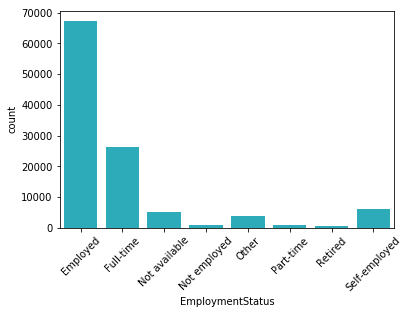

In [26]:
sb.countplot(data=loan[features], x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45);

#### The majority of borrowers are Employed all other categories constitute only small numbers of the borrowers. Let's move to the DelinquenciesLast7Years variable:

Text(0,0.5,'Count')

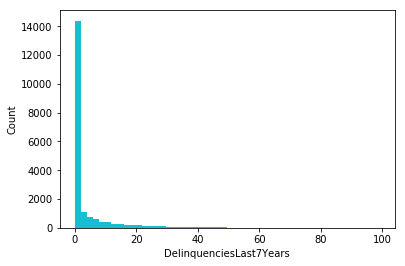

In [27]:
plt.hist(data=loan[features].dropna(), x='DelinquenciesLast7Years', bins=50, color=default_color);
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('Count')

#### Most of the Prosper clients have 0 delinquencies for the last 7 years, a small minority has up to 20 delinquencies and very tiny group had more than 20 but less than 100 delinquencies. Next let's take a look at StatedMonthlyIncome:



Text(0,0.5,'Count')

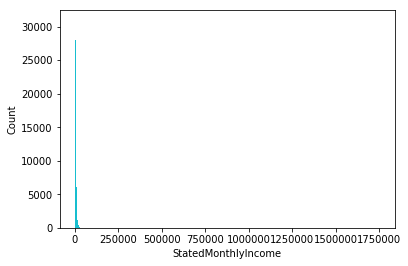

In [28]:
plt.hist(data=loan[features], x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')

#### Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [29]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan[features]['StatedMonthlyIncome'].std()
income_mean = loan[features]['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan[features][loan[features]['StatedMonthlyIncome'] >= boundary])

428

Text(0,0.5,'Count')

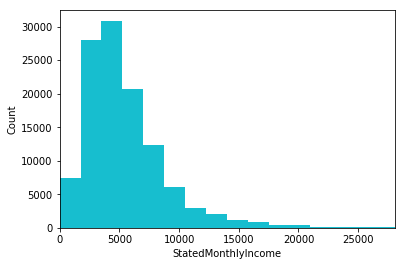

In [30]:
#Let's take a close look at the StatedMonthlyIncome;
# This time limit x scale by boundary
plt.hist(data=loan[features], x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')

#### With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is about 5,000. Next step – TotalProsperLoans:

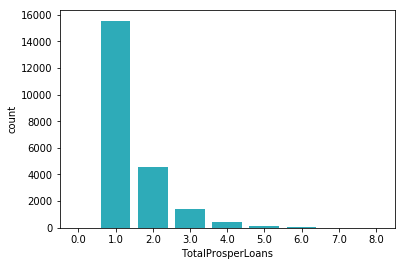

In [31]:
sb.countplot(data=loan[features], x='TotalProsperLoans', color=default_color);

#### For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - LoanOriginalAmount:

Text(0,0.5,'Count')

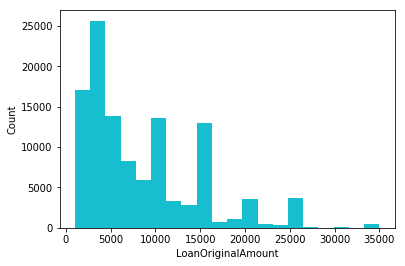

In [32]:
plt.hist(data=loan[features], x='LoanOriginalAmount', bins=20, color=default_color)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')

#### It looks like most of the loans are below 15,000 range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc.
#### Let's move on to LoanOriginationDate:

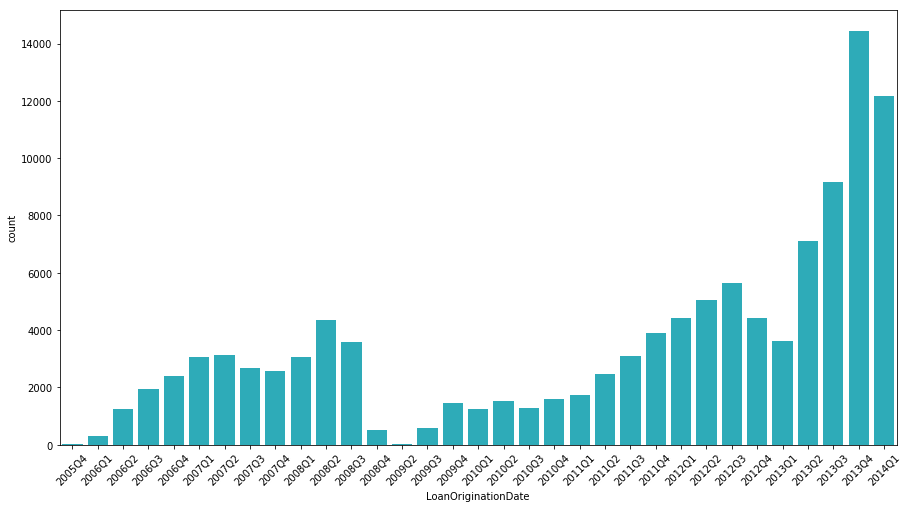

In [33]:
sr =pd.to_datetime(loan['LoanOriginationDate'])
result = pd.PeriodIndex(sr, freq='Q').sort_values()
#result = sr.dt.quarter
plt.figure(figsize=[15,8])
plt.xticks(rotation=45)
sb.countplot(data=loan[features], x=result, color=default_color );

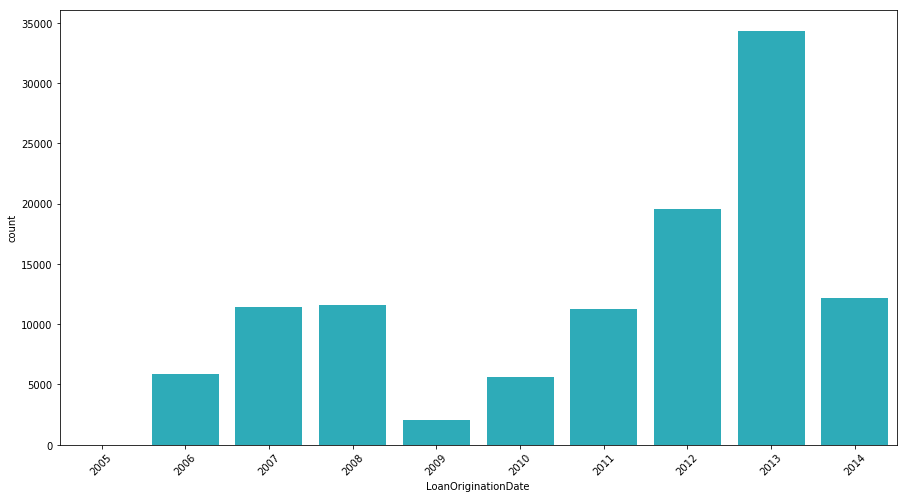

In [34]:
sr =pd.to_datetime(loan['LoanOriginationDate'])
result = pd.PeriodIndex(sr, freq='Y').sort_values()
#result = sr.dt.quarter
plt.figure(figsize=[15,8])
plt.xticks(rotation=45)
sb.countplot(data=loan[features], x=result, color=default_color );

In [35]:
pd.to_datetime(loan[features]['LoanOriginationDate']).describe()

count                  113937
unique                   1873
top       2014-01-22 00:00:00
freq                      491
first     2005-11-15 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

#### Data points are form 2009-07-20 till 2014-01-22.
#### We can clearly see a substansial growth for the number of loans from the start of 2013. 
#### Next item - Recommendations:

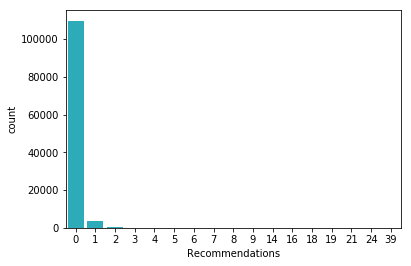

In [36]:
sb.countplot(data=loan[features], x='Recommendations', color=default_color)

#### The vast majority of loans obtained without recomendations. Next let's dig into Investors:

Text(0,0.5,'Count')

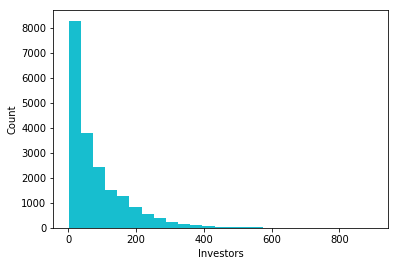

In [37]:
plt.hist(data=loan[features].dropna(), x='Investors', bins=25, color=default_color)
plt.xlabel('Investors')
plt.ylabel('Count')

#### Most loans have only one investor and majority less than 200 investors but some have about 1200 investors.

Text(0,0.5,'Count of Loans')

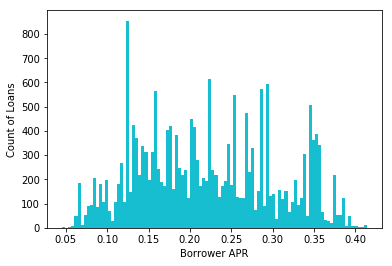

In [38]:
plt.hist(data=loan[features].dropna(), x='BorrowerAPR', bins=100, color=default_color);
plt.xlabel('Borrower APR')
plt.ylabel('Count of Loans')

#### The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [39]:
# getting a first overview over the variable ProsperScore
print(loan[features].ProsperScore.describe())
print(loan[features].ProsperScore.value_counts())

count     84853.0
unique       11.0
top           4.0
freq      12595.0
Name: ProsperScore, dtype: float64
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64


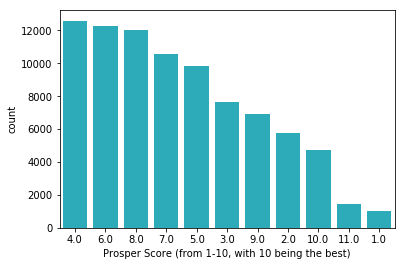

In [40]:
 #Bar Chart ProsperScore (custom risk score built using historical Prosper data)
# The score ranges from 1-10, with 10 being the best, or lowest risk score)

sb.countplot(data = loan[features], x = 'ProsperScore', color = default_color, 
             order = loan[features]['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### The bar chart shows that there are customers in the data set that have a score of 11 which should not be possible since the score just ranges from 1-10 which needs to be cleaned in the next step

In [41]:
# I will exclude all customers with a Prosper Score of 11
loan[features] = loan[features][loan[features]['ProsperScore'] != 11]
#dubbel check if the operation was succesful
loan[features][loan[features]['ProsperScore'] == 11].count()

Term                         0
LoanStatus                   0
BorrowerRate                 0
ProsperRating (Alpha)        0
ListingCategory (numeric)    0
EmploymentStatus             0
DelinquenciesLast7Years      0
StatedMonthlyIncome          0
TotalProsperLoans            0
LoanOriginalAmount           0
LoanOriginationDate          0
Recommendations              0
Investors                    0
BorrowerAPR                  0
ProsperScore                 0
Occupation                   0
IncomeRange                  0
dtype: int64

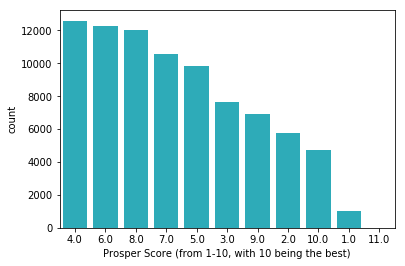

In [42]:
# now I will again plot the bar chart
sb.countplot(data = loan[features], x = 'ProsperScore', color = default_color, 
             order = loan[features]['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper. Furthermore, not many borrowers received the highest score of 10

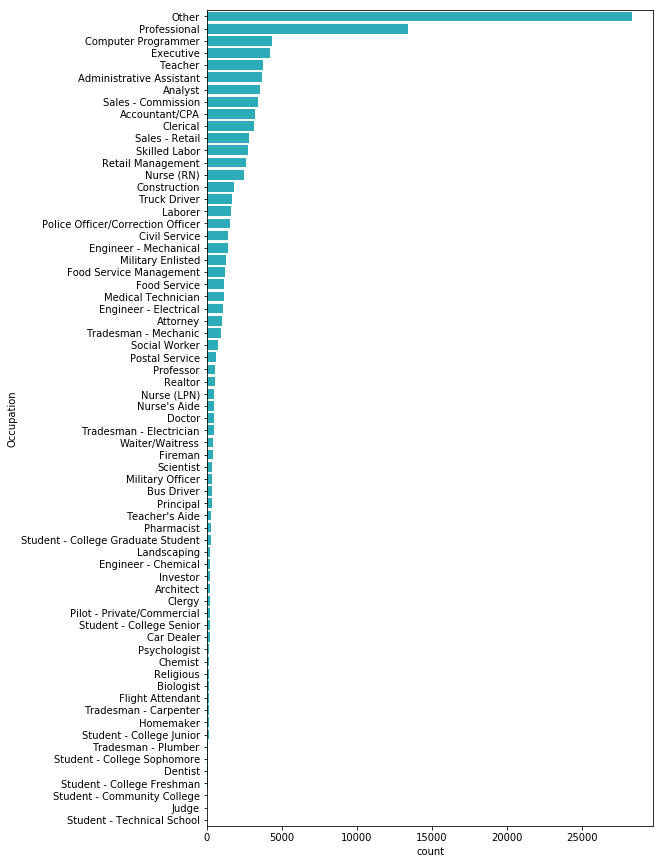

In [43]:
plt.figure(figsize=[8,15])
Occupation_order=loan[features]["Occupation"].value_counts().index
sb.countplot(data = loan[features], y = 'Occupation',color=default_color,order=Occupation_order)
plt.ylabel('Occupation')
plt.show()

#### In gerenral, studnets has the least number of loans.The mximum amount of loan belongs to "others" occupation, which I do not have any idea what it means! After "others, professionals with 15,000 are in the second place and all other jobs has <5000 number.

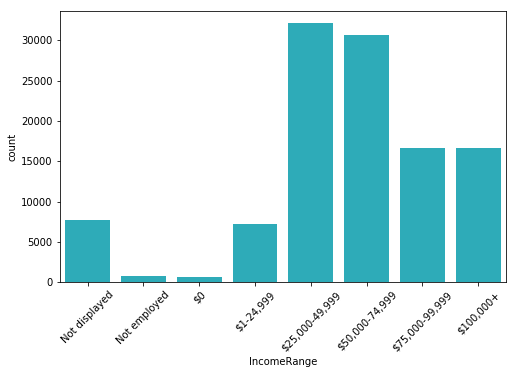

In [44]:
plt.figure(figsize=[8, 5])
IncomeRange_order=["Not displayed", "Not employed", "$0","$1-24,999","$25,000-49,999",
                   "$50,000-74,999","$75,000-99,999","$100,000+" ]
sb.countplot(data = loan[features], x = 'IncomeRange',color=default_color,order=IncomeRange_order)
plt.xlabel('IncomeRange')
plt.xticks(rotation=45)
plt.show()

#### Clearly, most of ("$32,000") loaners are have a salary of "$25,000-49,999" and "$50,000-74,999." After that, on the second level ("~$15,000"), laoners are making "$75,000-99,999" and "$100,000+." Rest of loaner, either are not employed, or making "<$25,000"

## Bivariate Exploration


##### To start off with, we will look at the pairwise correlations present between features in the data.

In [45]:
#Numberical vs Categorical features
numeric_vars = ['BorrowerRate', 
                'StatedMonthlyIncome','Recommendations','LoanOriginalAmount',
                'ListingCategory (numeric)', 'TotalProsperLoans',
                'LoanOriginationDate','Investors','BorrowerAPR']

categoric_vars = ['Term','LoanStatus', 'ProsperScore', 'EmploymentStatus','IncomeRange','Occupation']

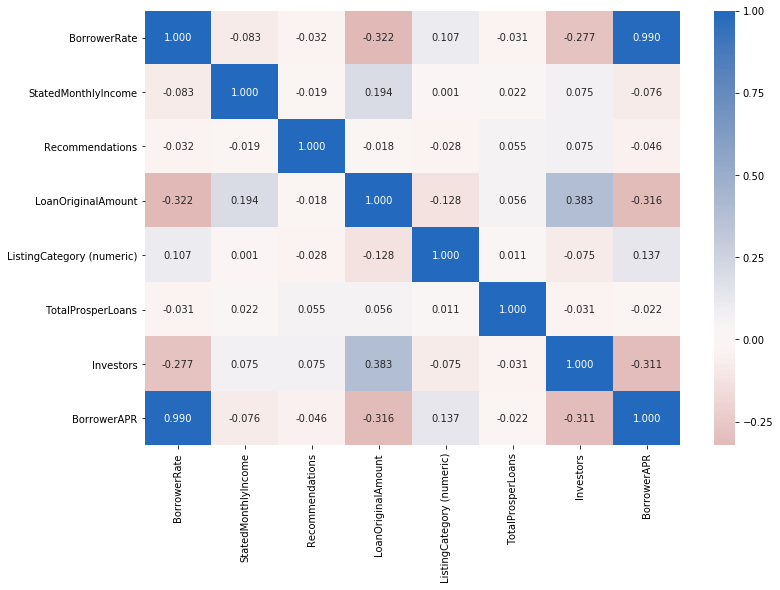

In [46]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan[features][numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

#### Correlation Plot: There are no strong positive relationships between any pairs. It makes sense because higher BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. 

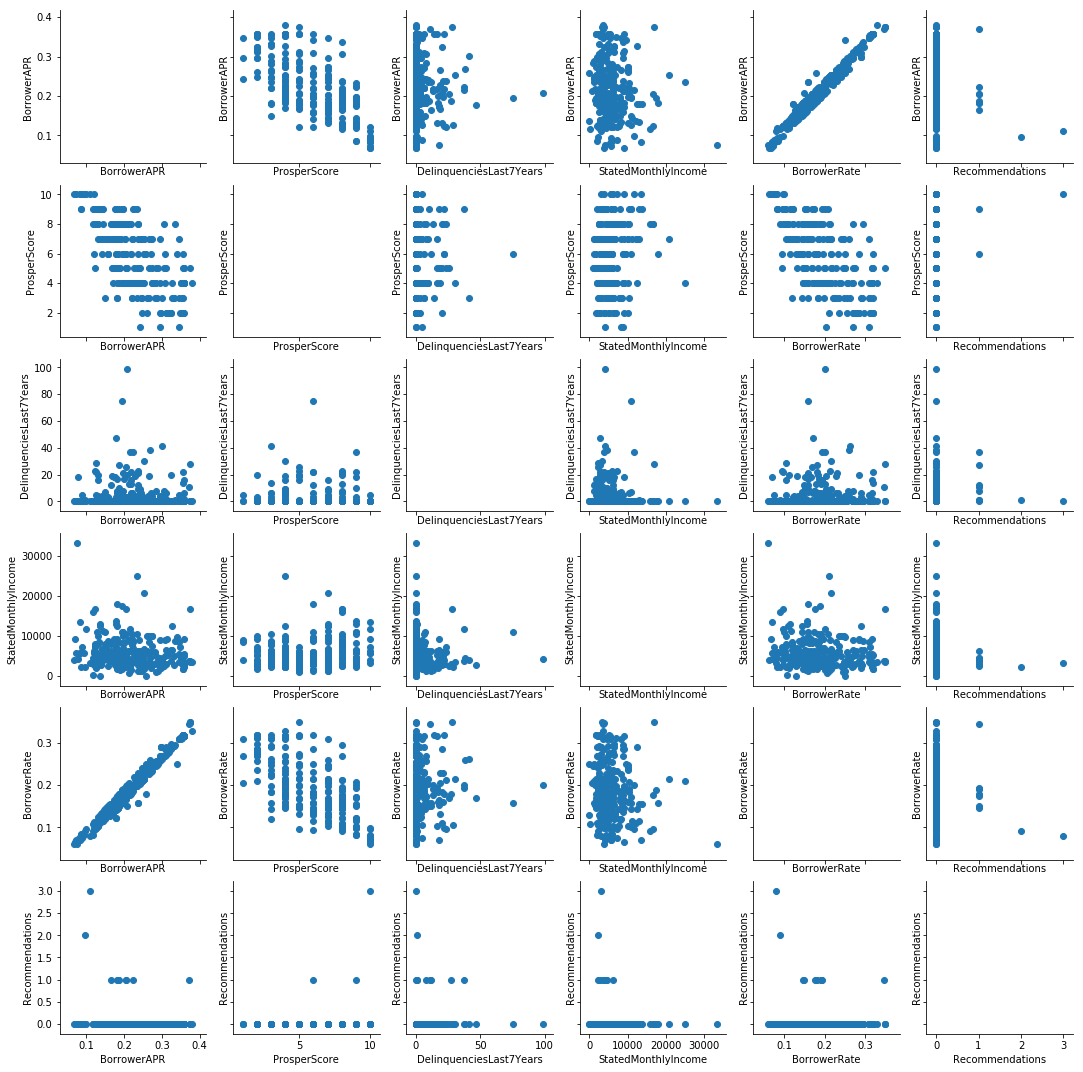

In [47]:
# plot matrix: only 300 random loans are used to see the pattern more clearer
numeric_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome','BorrowerRate','Recommendations' ]

samples = np.random.choice(loan[features].shape[0], 300, replace = False)
loan_samp = loan[features].loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
#plt.title('Matrix Plot')
xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

#### Matrix Plot: Similar to the correlation plot, we can determine which pair has negative or  positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. StatedMonthlyIncome does not give useful information on BorrowerAPR and will not be further analyzed.


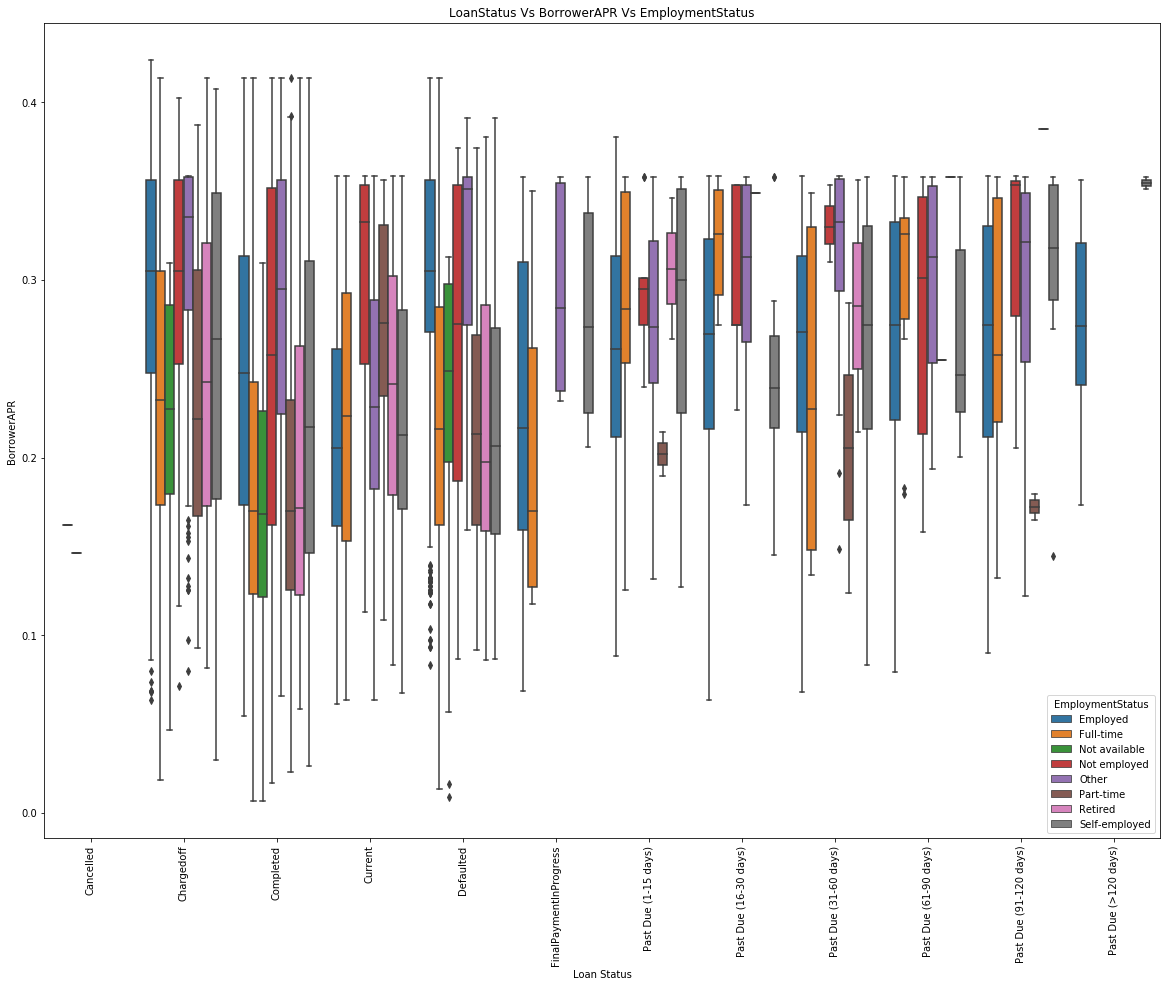

In [48]:
    # LoanStatus Vs BorrowerAPR VS EmploymentStatus
    plt.figure(figsize=[20,15])
    base_color = sb.color_palette()[0:]
    sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue='EmploymentStatus', data=loan[features], palette=base_color);
    plt.xticks(rotation = 90);
    plt.xlabel('Loan Status');
    plt.ylabel('BorrowerAPR');
    plt.title('LoanStatus Vs BorrowerAPR Vs EmploymentStatus');

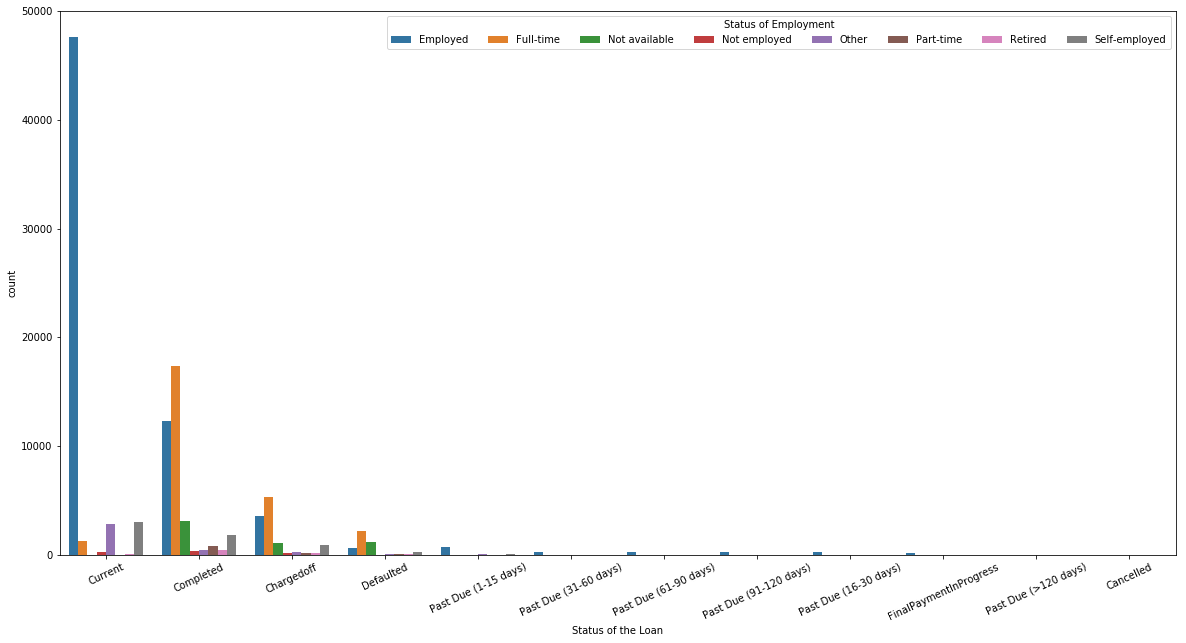

In [49]:
#plotting EmploymentStatus (Status of Employment) against LoanStatus with help of a heat map
plt.figure(figsize = [20,10])
sb.countplot(data = loan[features], x = 'LoanStatus', hue = 'EmploymentStatus', order = loan[features]['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The status of the employment of the borrower seem not to have an impact on the outcome of the loan.


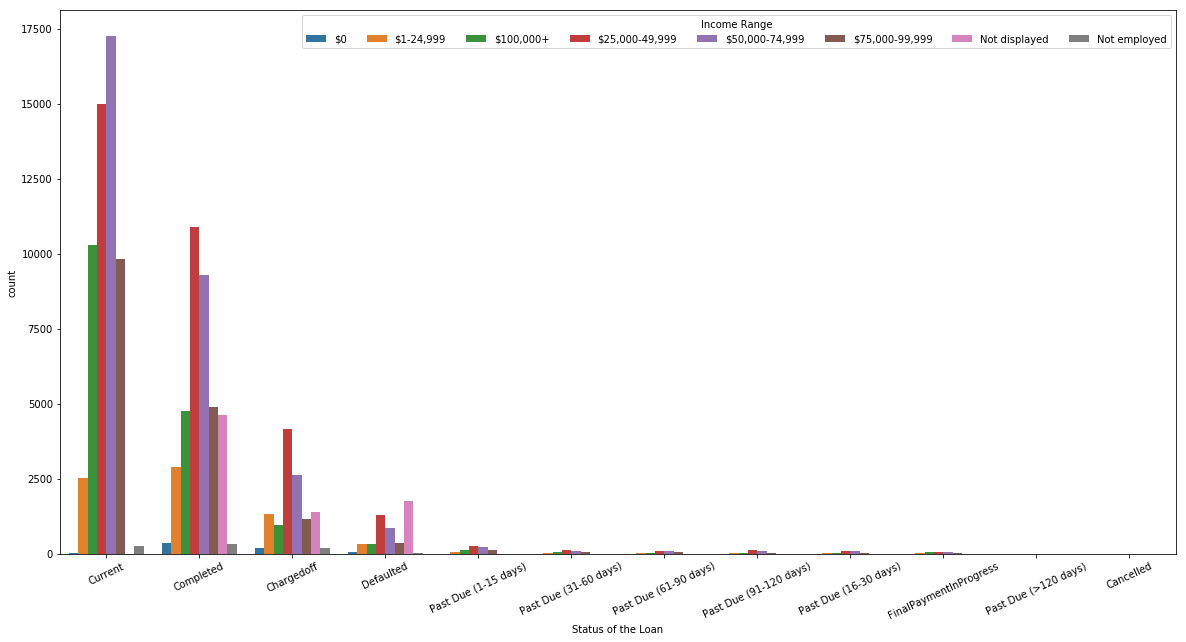

In [50]:
#plotting Income Range against LoanStatus with help of a heat map

plt.figure(figsize = [20,10])
sb.countplot(data = loan[features], x = 'LoanStatus', hue = 'IncomeRange', order = loan[features]['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The Income Range of the borrower seem not to have an impact on the outcome of the loan.


#### let's look at relationships between the four categorical features.

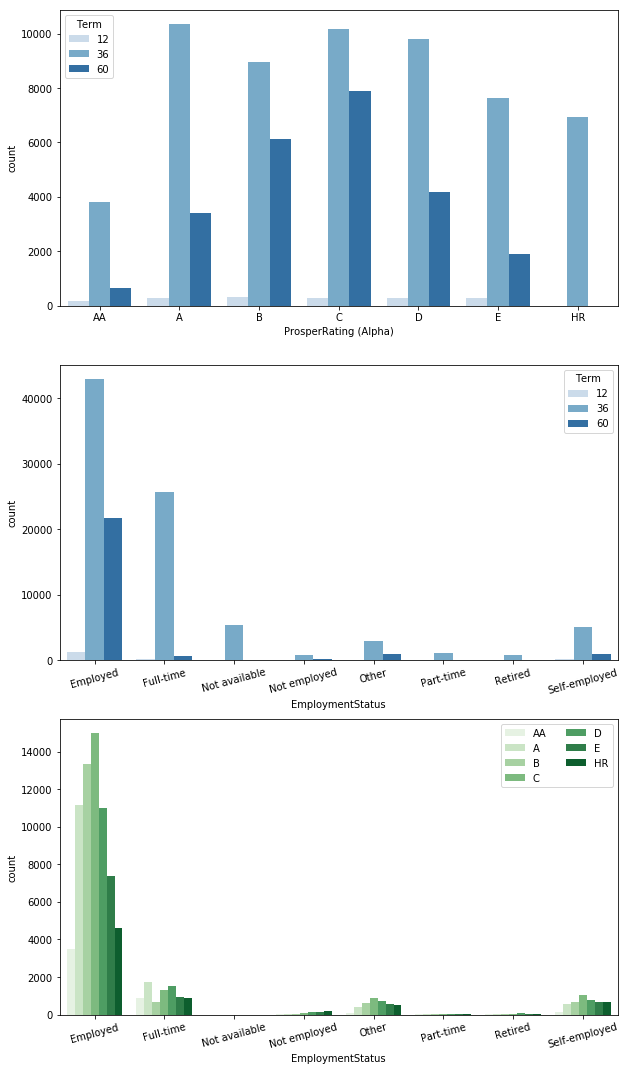

In [51]:
plt.figure(figsize = [10, 25])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = loan[features], x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loan[features], x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)
# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loan[features], x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

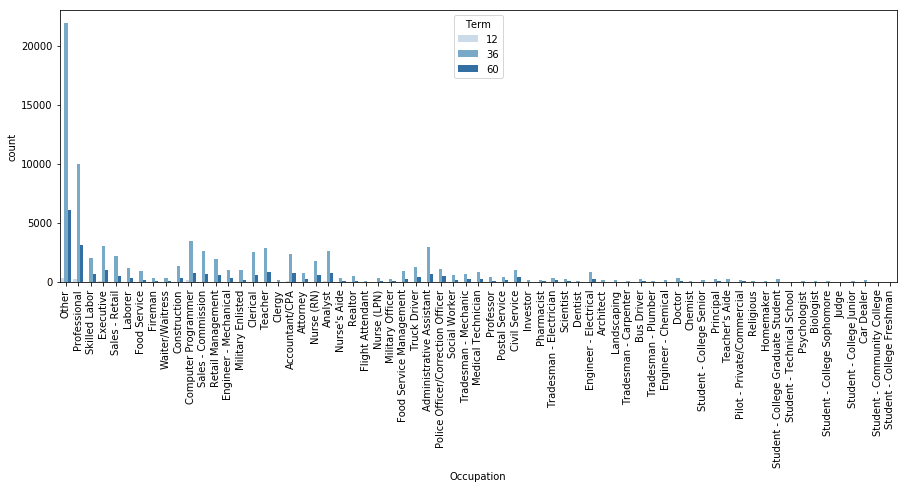

In [52]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sb.countplot(data = loan[features], x = 'Occupation', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=90);

#### The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

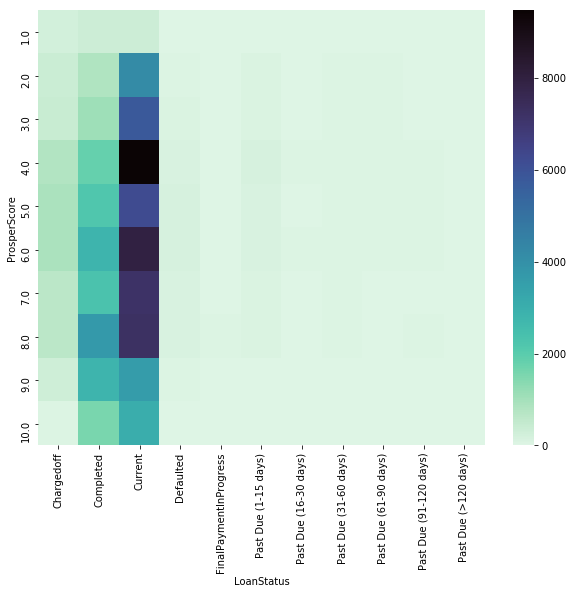

In [53]:
ct_counts=loan[features].groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)
plt.figure(figsize = [10,8])
sb.heatmap(ct_counts,cmap="mako_r");

#### Above graph shows that 1. in this data most people currenly have a loan or completed their loans and their interest rate is ~4-8.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
#### Most of those who completed their loans has a ProsperScore above 3. Most of those who currently has loan, has a ProsperScore of 4, and the minimum count of loaners belong to those who has a ProsperScore of 1. The majority (~50,000) of people who currenly has a loan are emplyed no matter what is their ProsperScore. If their ProsperScore is between 4 and 8, the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000. In ProsperScore of 2 to 8, the number of loaners who has a salary of 25-49k and 50-74k is more than others salary groups and if the ProsperScore is between 4 and 8, the popluation of both salries of 25-49k and 50-74k groups ranges between 2500 and 3900. Plots also show that BorrowerRate has a negative relationship with LoanOriginalAmount and has a postive relationship with ProsperScore. IncomeRange also affect the LoanOriginalAmount in a positive way. The plot of the full data using a violin plot suggests that borrow rate is independant of income range and ranges ~0.15-0.21



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
#### There is a positive relationshi between ProsperScore and LoanOriginalAmount. The number of people with emplyed and full time status who currently have a loan or completed their laons is much higher than other people with other employment status. In this data, most people currenly have a loan or completed their loans, and their interest rates is ~4-8.

## Multivariate Exploration

## Exploration

#### The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR , loan original amount , monthely incom and employment status

## 1- Term effect on relationship of APR and loan amount 

### Observation:

#### Term doesn't seem to have effect on relationship of APR and loan amount

<Figure size 841.68x595.44 with 0 Axes>

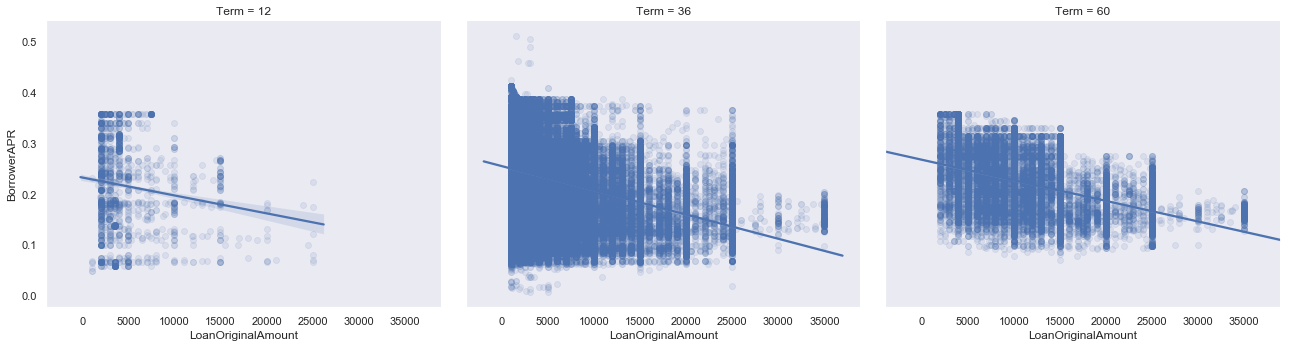

In [95]:
# Term effect on relationship of APR and loan amount
plt.figure(figsize = [11.69, 8.27])
g=sb.FacetGrid(data=loan[features], aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sb.regplot,'LoanOriginalAmount','BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
plt.tight_layout()

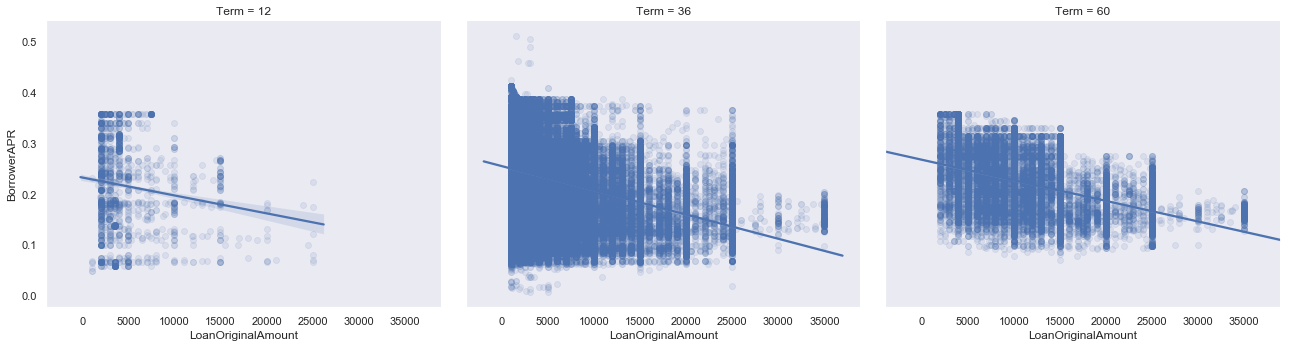

In [96]:
g.fig

## 2- Prosper rating effect on relationship of APR and loan amount

### Observation:

#### 1- The loan amount increases with better rating. 
#### 2- The borrower APR decreases with better rating. 

#### 3- Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

<Figure size 841.68x595.44 with 0 Axes>

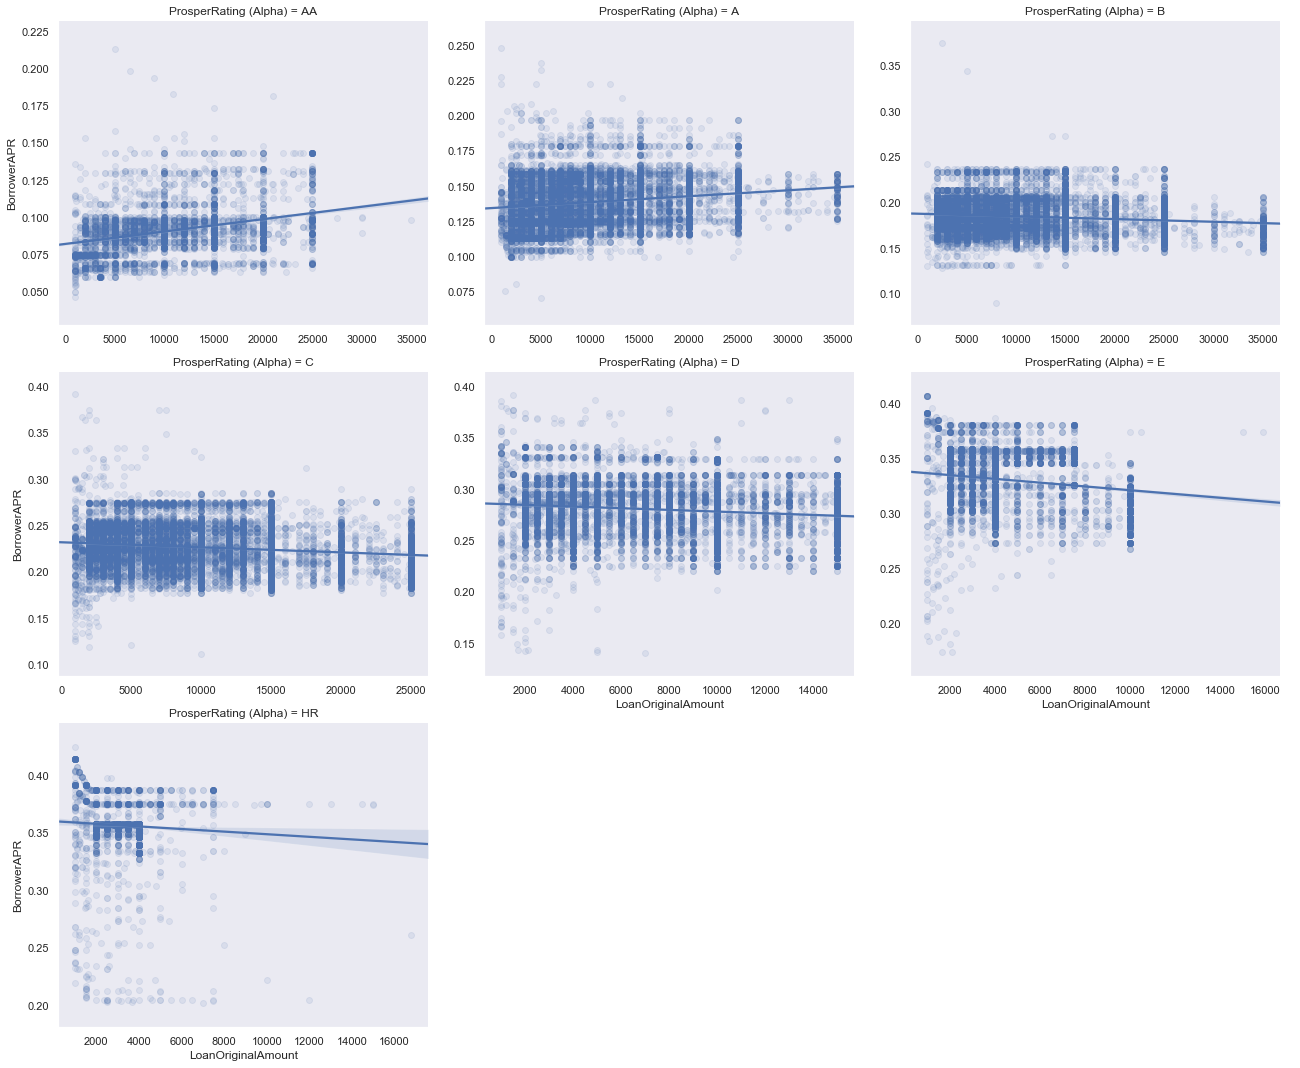

In [97]:
# Prosper rating effect on relationship of APR and loan amount
plt.figure(figsize = [11.69, 8.27])
sb.set(style='dark', color_codes=True)
g=sb.FacetGrid(data=loan[features], aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=3,sharey=False, sharex=False)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
plt.tight_layout()

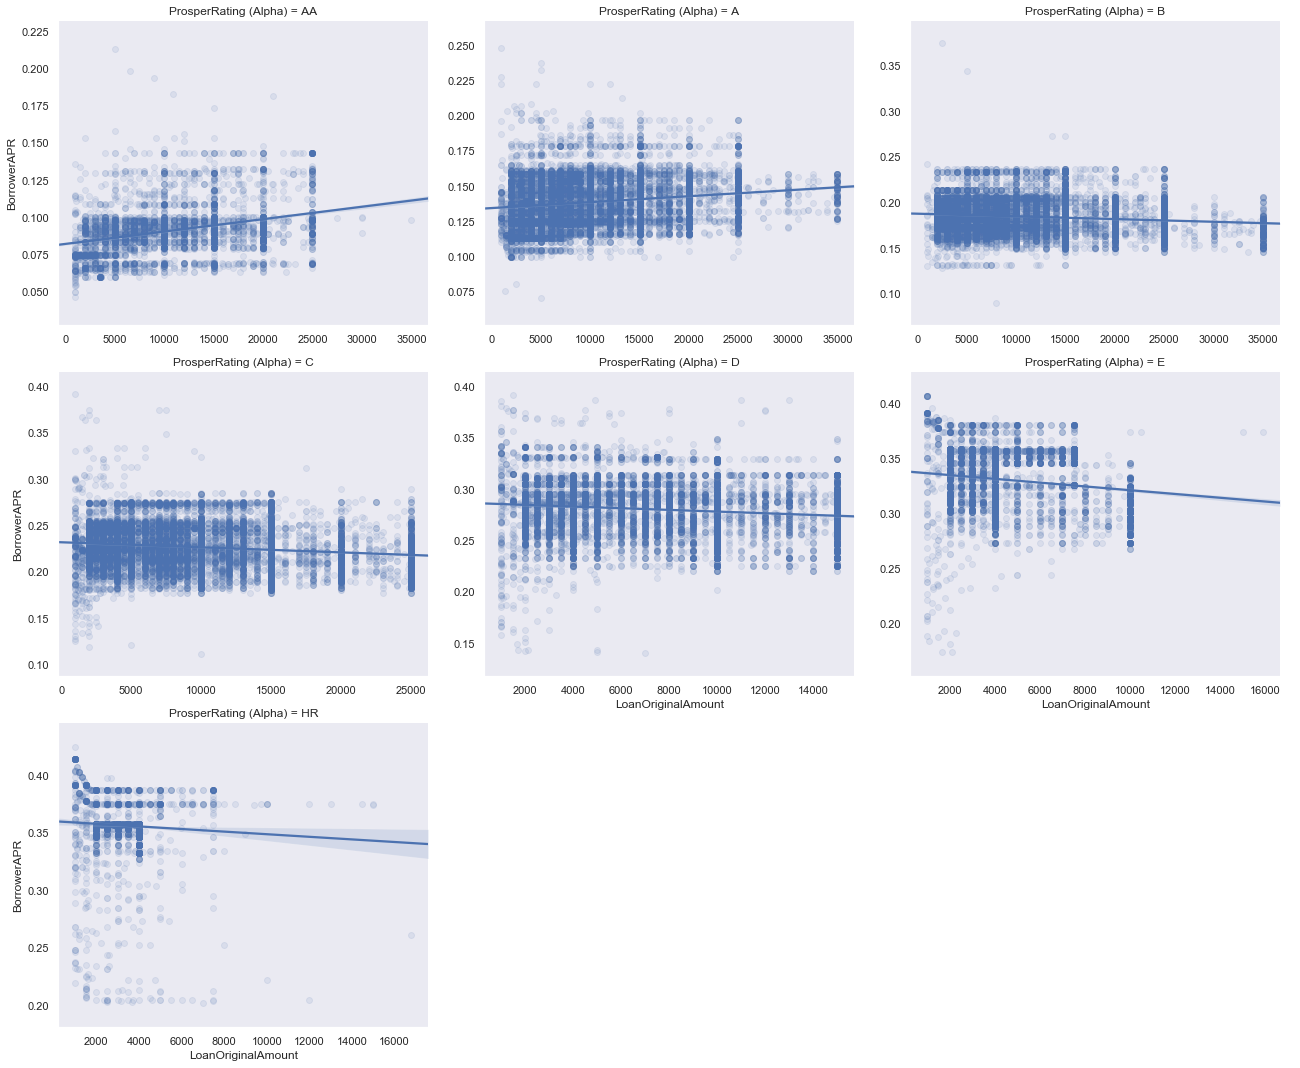

In [98]:
g.fig

## 3- Borrower APR across Prosper rating and term

### Observation:

#### Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

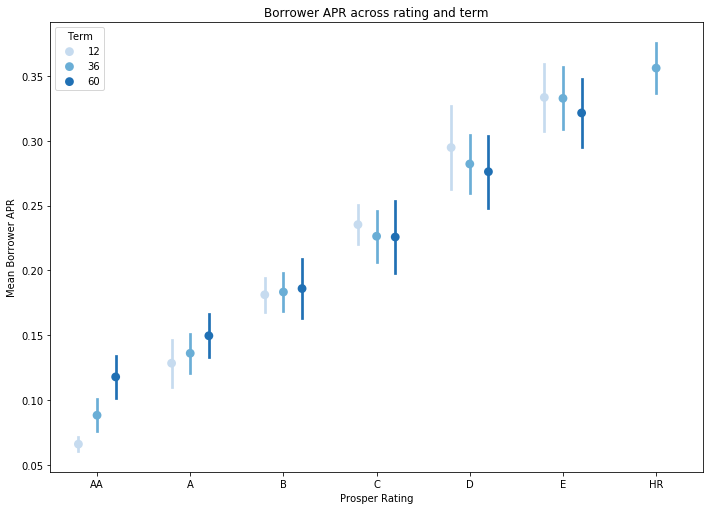

In [73]:
fig = plt.figure(figsize = [11.69, 8.27])
ax = sb.pointplot(data = loan[features], x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Prosper rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating');
ax.set_yticklabels([],minor = True);

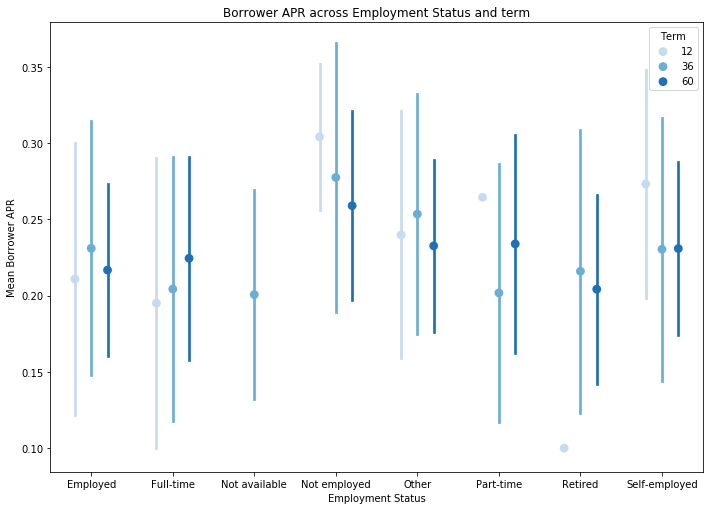

In [88]:
plt.figure(figsize = [11.69, 8.27])
ax = sb.pointplot(data = loan[features], x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Employment Status and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Employment Status');
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 0);

## 4- The Prosper rating and term effects on stated monthly income and loan original amount 

### Observation:

#### 1- For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings.
#### 2- But for loan amount, there is a interaction between term and rating.

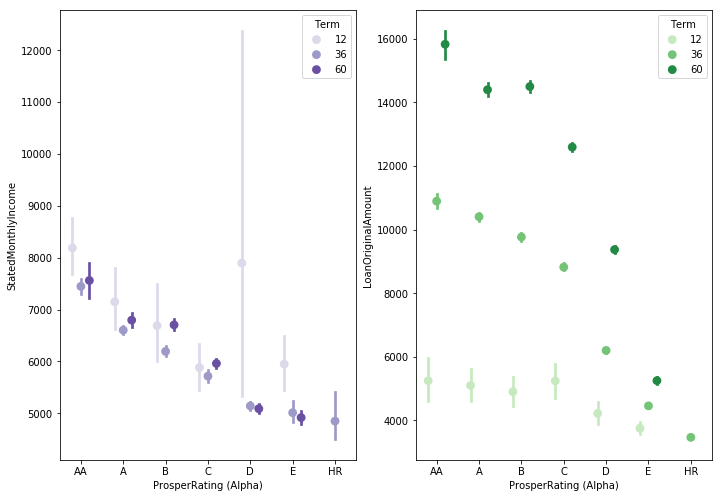

In [76]:
#plt.figure(figsize = [11.69, 8.27])
fig, ax = plt.subplots(ncols=2, figsize=[11.69, 8.27])
sb.pointplot(data = loan[features], x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', 
             hue = 'Term',palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
plt.ylabel('Stated Monthly Income')
plt.xlabel('Prosper Rating');
sb.pointplot(data = loan[features], x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', 
             hue = 'Term',palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);
plt.ylabel('Loan Original Amount')
plt.xlabel('Prosper Rating');

## 5- The rating and term effects on stated monthly income and loan original amount variables

### Continue the observations:

#### 3- We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

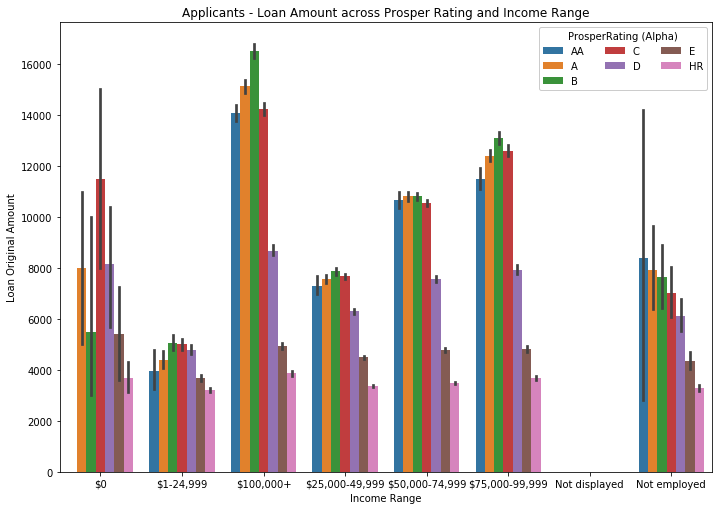

In [78]:
plt.figure(figsize = [11.69, 8.27])
ax = sb.barplot(data = loan[features], x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'ProsperRating (Alpha)')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');
plt.ylabel('Loan Original Amount')
plt.xlabel('Income Range');

## 5- Does rating depend on the monhtly income and Employment status?

### Observation:
######  We can clearly observe that ProsperRating lowers the proporration of individuals with employment stsuses ' Not employed ' and' Retired'
###### We can clearly observe that HR prosper rating applicants have higher interest rates and the applicants 

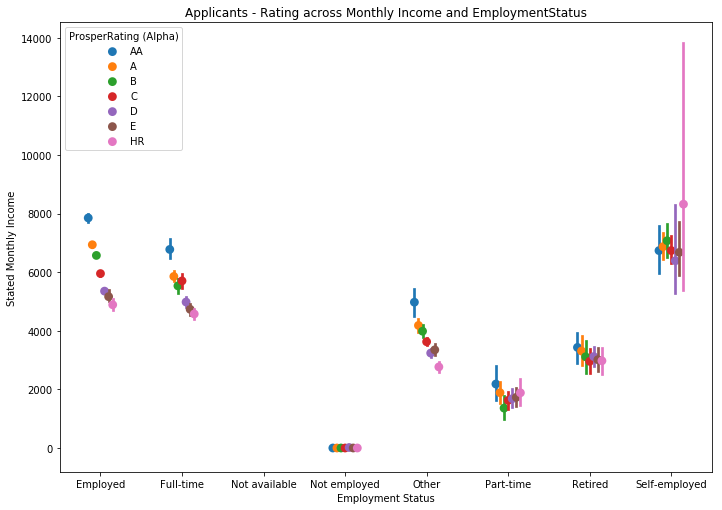

In [77]:
plt.figure(figsize = [11.69, 8.27])
ax = sb.pointplot(data = loan[features], x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');
plt.ylabel('Stated Monthly Income')
plt.xlabel('Employment Status');

### Insights from the multivariate exploration data
 1- For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

 2- Employed and full time employees have their mean salaries in higher range

 3- Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

 4- The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

 5- HR prosper rating applicants have higher interest rates

## To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange,  and employment status.